<a href="https://colab.research.google.com/github/SangHee33/SangHee1/blob/main/YB1%EC%A1%B0_%EC%BB%A8%ED%8D%BC%EB%9F%B0%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한국어 깨짐 방지

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#국민여행조사 데이터

### 데이터 확인

In [32]:
travel = pd.read_excel("travel(3).xlsx")

In [4]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [5]:
"""travel=pd.read_excel("/content/drive/MyDrive/travel(3).xlsx")"""

'travel=pd.read_excel("/content/drive/MyDrive/travel(3).xlsx")'

In [34]:
travel.head()

,ID,D_TRA1_CASE,D_TRA1_1_SPOT,D_TRA1_1_Q6,A4_1,A5_1,A5_2,A5_3,A5_4,A5_5,...,국내_A_여행지출_국내전체_세종,국내_A_여행지출_국내전체_경기,국내_A_여행지출_국내전체_강원,국내_A_여행지출_국내전체_충북,국내_A_여행지출_국내전체_충남,국내_A_여행지출_국내전체_전북,국내_A_여행지출_국내전체_전남,국내_A_여행지출_국내전체_경북,국내_A_여행지출_국내전체_경남,국내_A_여행지출_국내전체_제주
0,11010550211_277566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11010550211_277569,1.0,32070.0,NaN,2.0,1.0,2.0,3.0,NaN,NaN,...,0.0,0.0,160000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11010550211_277571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11010550211_277572,1.0,39020.0,NaN,2.0,1.0,2.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0
4,11010550211_277588,1.0,32030.0,NaN,2.0,1.0,2.0,NaN,NaN,NaN,...,0.0,0.0,133333.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52041 entries, 0 to 52040
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 52041 non-null  object 
 1   D_TRA1_CASE        25016 non-null  float64
 2   D_TRA1_1_SPOT      25016 non-null  float64
 3   D_TRA1_1_Q6        7999 non-null   float64
 4   A4_1               22067 non-null  float64
 5   A5_1               17455 non-null  float64
 6   A5_2               13374 non-null  float64
 7   A5_3               1069 non-null   float64
 8   A5_4               2270 non-null   float64
 9   A5_5               1633 non-null   float64
 10  A5_6               12815 non-null  float64
 11  A5_7               257 non-null    float64
 12  A5_8               1344 non-null   float64
 13  A5_9               673 non-null    float64
 14  A5_10              20 non-null     float64
 15  A5_11              310 non-null    float64
 16  A5_12              313

###전처리

In [59]:
travel = travel.dropna(subset = ["D_TRA1_1_SPOT"])

In [60]:
travel[travel["A10A_1"] == 9] = 0

In [61]:
travel = travel[(travel["D_TRA1_CASE"] == 1) | (travel["D_TRA1_CASE"] == 2)]

In [62]:
travel = travel[travel["D_TRA1_1_Q6"] != 0]

In [63]:
travel = travel.fillna(0)

In [41]:
# A5_1 ~ A5_20 값들 1로 만들기

for i in range(1, 21):
  travel[f"A5_{i}"] = travel[f"A5_{i}"] / i

In [42]:
# Season 칼럼 만들기
def season(bmon):
  if bmon in [3, 4, 5]:
    return "봄"
  if bmon in [6, 7, 8]:
    return "여름"
  if bmon in [9, 10, 11]:
    return "가을"
  if bmon in [12, 1, 2]:
    return "겨울"

travel["Season"] = travel["BMON"].apply(season)

In [43]:
# D_TRA1_1_SPOT 슬라이싱해서 시/도, 시/군/구 칼럼 만들기

travel["시/도"] = travel["D_TRA1_1_SPOT"].astype(str).str[:2]
travel["시/군/구"] = travel["D_TRA1_1_SPOT"].astype(str).str[2:5]

In [44]:
# 필요없는 칼럼 삭제
travel = travel.drop(["국내_A_여행지출_국내전체_서울","국내_A_여행지출_국내전체_부산","국내_A_여행지출_국내전체_대구","국내_A_여행지출_국내전체_인천","국내_A_여행지출_국내전체_광주","국내_A_여행지출_국내전체_대전","국내_A_여행지출_국내전체_울산","국내_A_여행지출_국내전체_세종","국내_A_여행지출_국내전체_경기","국내_A_여행지출_국내전체_강원","국내_A_여행지출_국내전체_충북","국내_A_여행지출_국내전체_충남","국내_A_여행지출_국내전체_전북","국내_A_여행지출_국내전체_전남","국내_A_여행지출_국내전체_경북","국내_A_여행지출_국내전체_경남","국내_A_여행지출_국내전체_제주","DQ6A","DQ6B"],axis=1)

In [45]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20809 entries, 1 to 52039
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             20809 non-null  object 
 1   D_TRA1_CASE    20809 non-null  float64
 2   D_TRA1_1_SPOT  20809 non-null  float64
 3   D_TRA1_1_Q6    20809 non-null  float64
 4   A4_1           20809 non-null  float64
 5   A5_1           20809 non-null  float64
 6   A5_2           20809 non-null  float64
 7   A5_3           20809 non-null  float64
 8   A5_4           20809 non-null  float64
 9   A5_5           20809 non-null  float64
 10  A5_6           20809 non-null  float64
 11  A5_7           20809 non-null  float64
 12  A5_8           20809 non-null  float64
 13  A5_9           20809 non-null  float64
 14  A5_10          20809 non-null  float64
 15  A5_11          20809 non-null  float64
 16  A5_12          20809 non-null  float64
 17  A5_13          20809 non-null  float64
 18  A5_14 

### 시각화

<BarContainer object of 20 artists>

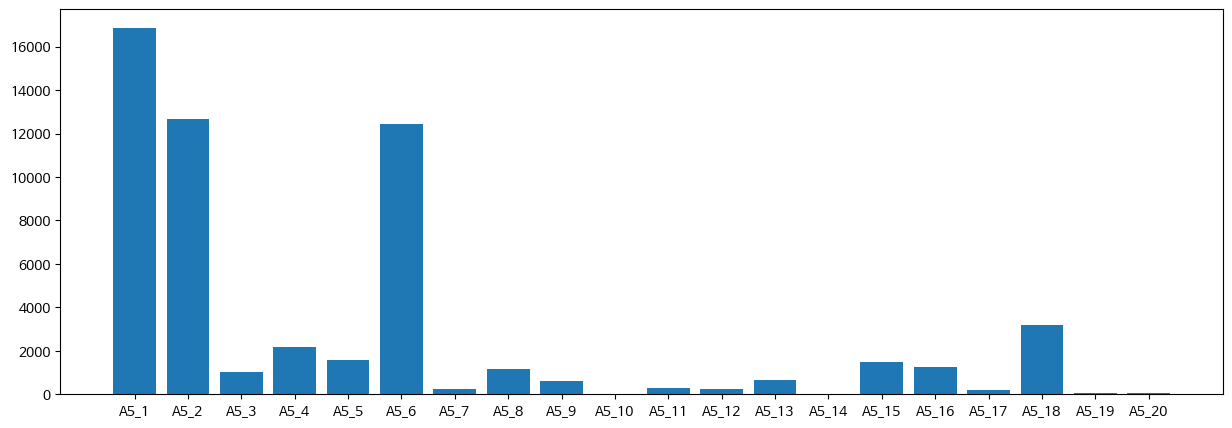

In [46]:
# 여행 활동별 관광객 수
plt.figure(figsize=(15,5))
x = []
y = []
for i in range(1, 21):
  x.append(f"A5_{i}")
  y.append(len(travel[travel[f"A5_{i}"] == 1]))

plt.bar(x,y)

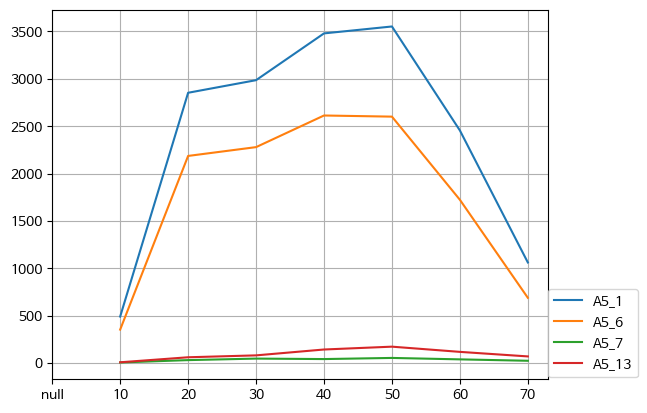

In [47]:
# 연령별 웰니스 관광객 수
counts = travel.groupby("BAGE").sum()

plt.plot(counts['A5_1'],label='A5_1')
plt.plot(counts['A5_6'],label='A5_6')
plt.plot(counts['A5_7'],label='A5_7')
plt.plot(counts['A5_13'],label='A5_13')

values = ['null',10,20,30,40,50,60,70]
bage = [0,1,2,3,4,5,6,7]

plt.legend(loc=(1, 0.005))
plt.grid()
plt.xticks(bage,values)

plt.show()

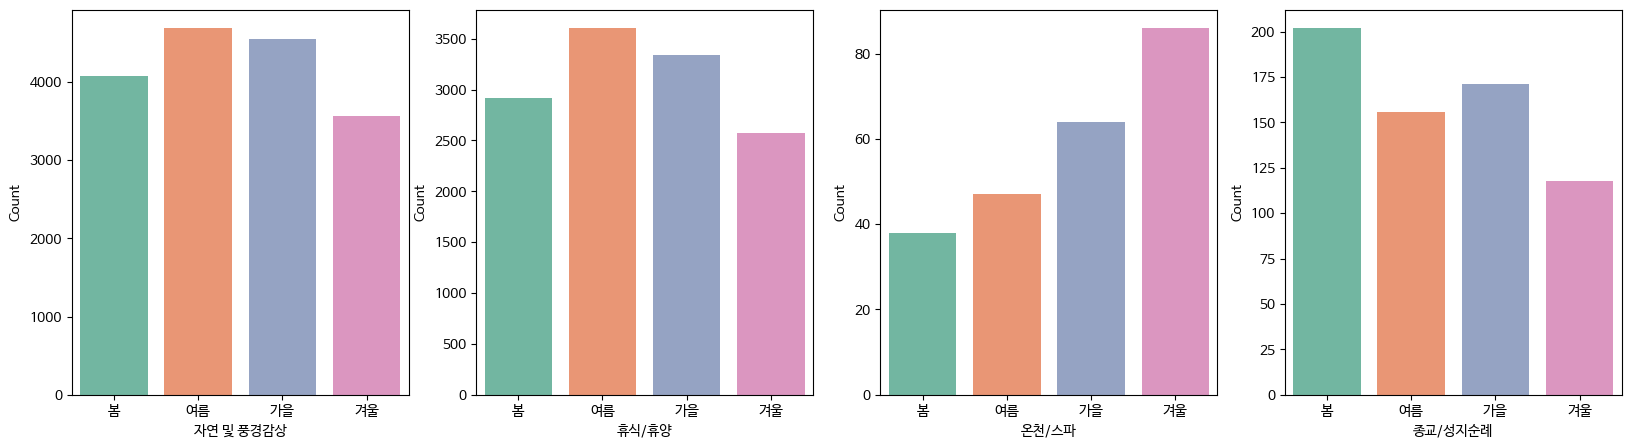

In [48]:
# 웰니스 관광의 계절별 관광객 수
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
filtered_data = travel[travel["A5_1"] == 1]
sns.countplot(x = "Season", data = filtered_data, palette = "Set2", order = ["봄", "여름", "가을", "겨울"])
plt.xlabel("자연 및 풍경감상")
plt.ylabel("Count")

plt.subplot(1, 4, 2)
filtered_data = travel[travel["A5_6"] == 1]
sns.countplot(x = "Season", data = filtered_data, palette = "Set2", order = ["봄", "여름", "가을", "겨울"])
plt.xlabel("휴식/휴양")
plt.ylabel("Count")

plt.subplot(1, 4, 3)
filtered_data = travel[travel["A5_7"] == 1]
sns.countplot(x = "Season", data = filtered_data, palette = "Set2", order = ["봄", "여름", "가을", "겨울"])
plt.xlabel("온천/스파")
plt.ylabel("Count")

plt.subplot(1, 4, 4)
filtered_data = travel[travel["A5_13"] == 1]
sns.countplot(x = "Season", data = filtered_data, palette = "Set2", order = ["봄", "여름", "가을", "겨울"])
plt.xlabel("종교/성지순례")
plt.ylabel("Count")

plt.show()

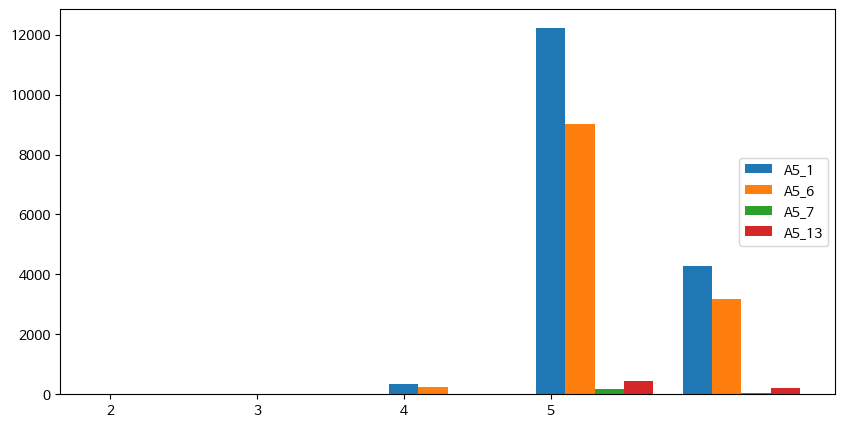

In [49]:
# 웰니스 관광별 만족도
counts3 = travel.groupby('A10').sum()

plt.figure(figsize=(10, 5))

x = np.array(range(len(counts3)))
w = 0.2

plt.bar(x,counts3['A5_1'] ,width=w, label='A5_1')

x= x + w

plt.bar(x,counts3['A5_6'] , width=w, label='A5_6')

x= x + w

plt.bar(x,counts3['A5_7'] , width=w, label='A5_7')

x= x + w

plt.bar(x,counts3['A5_13'] , width=w, label='A5_13')

values = [2,3,4,5]

plt.legend(loc=5)
plt.xticks(range(4),values)
plt.show()

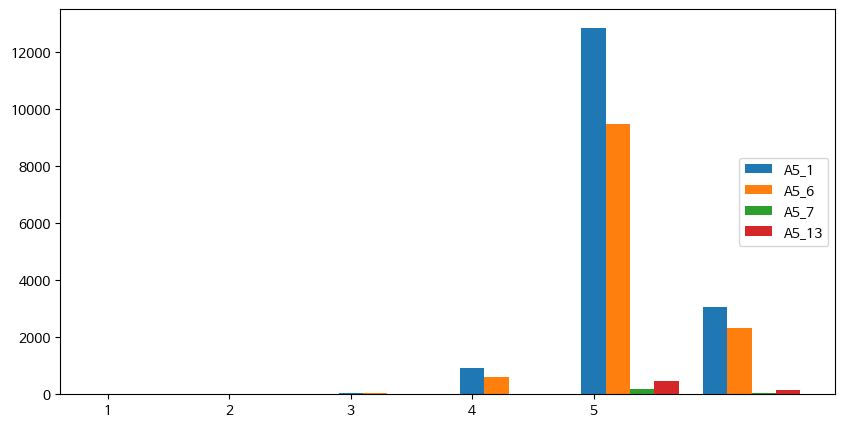

In [50]:
# 웰니스 관광별 재방문의도
counts4 = travel.groupby('A11').sum()

plt.figure(figsize=(10, 5))

x = np.array(range(len(counts4)))
w = 0.2

plt.bar(x,counts4['A5_1'] ,width=w, label='A5_1')

x= x + w

plt.bar(x,counts4['A5_6'] , width=w, label='A5_6')

x= x + w

plt.bar(x,counts4['A5_7'] , width=w, label='A5_7')

x= x + w

plt.bar(x,counts4['A5_13'] , width=w, label='A5_13')

values = [1,2,3,4,5]

plt.legend(loc=5)
plt.xticks(range(5),values)
plt.show()

### 웰니스 TOP5 시/도

In [64]:
wness_spot=travel[(travel['A5_1']==1.0)|(travel['A5_6']==1)|(travel['A5_7']==1)|(travel['A5_13']==1)]['시/도'].value_counts()

In [65]:
top_5 = wness_spot.head(5)
top_5

32    1013
36     722
38     623
34     598
39     578
Name: 시/도, dtype: int64

In [66]:
num = top_5.tolist()

In [67]:
spot = ["강원도", "전라남도", "경상남도", "충청남도", "제주특별자치도"]

In [68]:
wellness=pd.DataFrame({'spot':spot,'num':num})
wellness

,spot,num
0,강원도,1013
1,전라남도,722
2,경상남도,623
3,충청남도,598
4,제주특별자치도,578


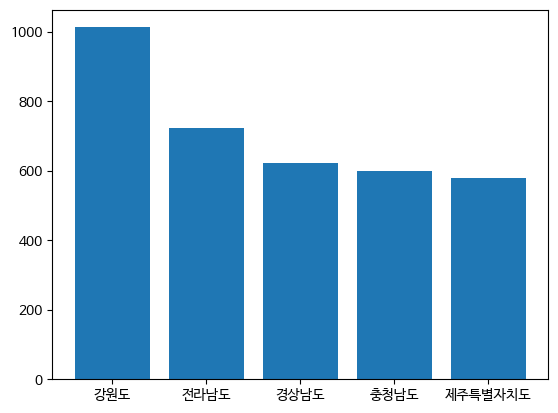

In [69]:
plt.bar(wellness["spot"], wellness["num"])
plt.show()

### 웰니스 TOP20 시/군/구

In [70]:
wness_spot_2=travel[(travel['A5_1']==1.0)|(travel['A5_6']==1)|(travel['A5_7']==1)|(travel['A5_13']==1)]['D_TRA1_1_SPOT'].value_counts()

In [71]:
top_20 = wness_spot_2.head(20)
top_20

39010.0    298
39020.0    280
32030.0    256
36020.0    229
32060.0    193
21090.0    180
34030.0    171
34380.0    158
37020.0    156
38090.0    135
38350.0    117
35380.0    104
37010.0     92
31370.0     91
35010.0     80
33380.0     79
32410.0     78
32340.0     75
35330.0     67
38050.0     62
Name: D_TRA1_1_SPOT, dtype: int64

In [72]:
num = top_20.tolist()

In [73]:
spot=[39010.0, 39020.0, 32030.0, 36020.0, 32060.0, 21090.0, 34030.0, 34380.0, 37020.0,
      38090.0, 38350.0, 35380.0, 37010.0, 31370.0, 35010.0, 33380.0, 32410.0, 32340.0,
      35330.0, 38050.0 ]

In [74]:
x  = []
for i,j in enumerate(spot):
  if 21000 <= spot[i] < 22000:
    x.append(spot[i]-21000)
    spot[i]= '부산광역시'
  elif 31000 <= spot[i] < 32000:
    x.append(spot[i]-31000)
    spot[i]= '경기도'
  elif 32000 <= spot[i] < 33000:
    x.append(spot[i]-32000)
    spot[i]= '강원도'
  elif 33000 <= spot[i] < 34000:
    x.append(spot[i]-33000)
    spot[i]= '충청북도'
  elif 34000 <= spot[i] < 35000:
    x.append(spot[i]-34000)
    spot[i]= '충청남도'
  elif 35000 <= spot[i] < 36000:
    x.append(spot[i]-35000)
    spot[i]= '전라북도'
  elif 36000 <= spot[i] < 37000:
    x.append(spot[i]-36000)
    spot[i]= '전라남도'
  elif 37000 <= spot[i] < 38000:
    x.append(spot[i]-37000)
    spot[i]= '경상북도'
  elif 38000 <= spot[i] < 39000:
    x.append(spot[i]-38000)
    spot[i]= '경상남도'
  elif 39000 <= spot[i] < 40000:
    x.append(spot[i]-39000)
    spot[i]= '제주특별자치도'

In [75]:
x

[10.0,
 20.0,
 30.0,
 20.0,
 60.0,
 90.0,
 30.0,
 380.0,
 20.0,
 90.0,
 350.0,
 380.0,
 10.0,
 370.0,
 10.0,
 380.0,
 410.0,
 340.0,
 330.0,
 50.0]

In [76]:
spot

['제주특별자치도',
 '제주특별자치도',
 '강원도',
 '전라남도',
 '강원도',
 '부산광역시',
 '충청남도',
 '충청남도',
 '경상북도',
 '경상남도',
 '경상남도',
 '전라북도',
 '경상북도',
 '경기도',
 '전라북도',
 '충청북도',
 '강원도',
 '강원도',
 '전라북도',
 '경상남도']

In [77]:
city = ["제주시", "서귀포시", "강릉시", "여수시", "속초시", "해운대구", "보령시", "태안군", "경주시", "거제시", "남해군", "부안군", "포항시", "가평군", "전주시", "단양군", "양양군", "평창군", "무주군", "통영시"]

In [78]:
wellness_city=pd.DataFrame({'spot':spot, "city": city, 'num':num})
wellness_city

,spot,city,num
0,제주특별자치도,제주시,298
1,제주특별자치도,서귀포시,280
2,강원도,강릉시,256
3,전라남도,여수시,229
4,강원도,속초시,193
5,부산광역시,해운대구,180
6,충청남도,보령시,171
7,충청남도,태안군,158
8,경상북도,경주시,156
9,경상남도,거제시,135


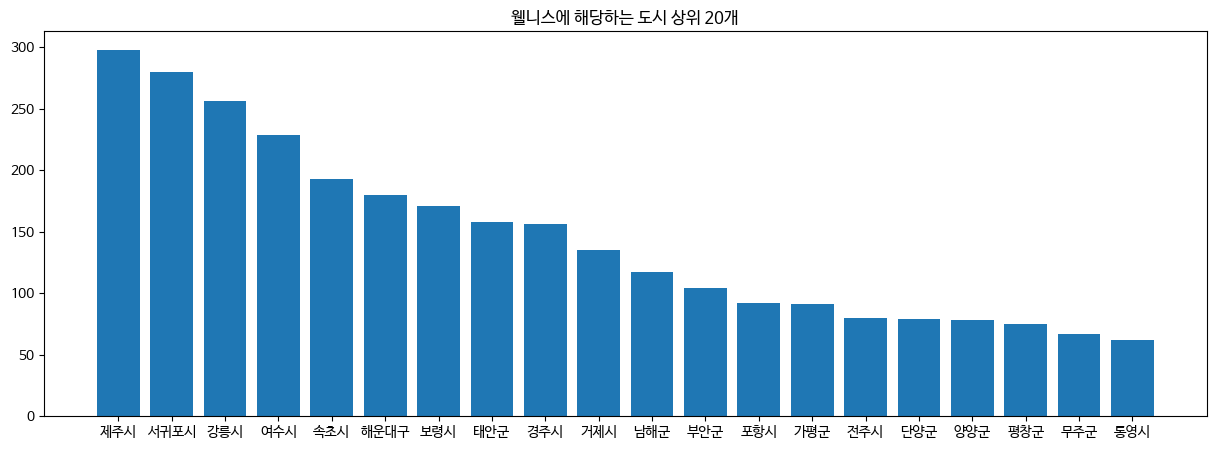

In [79]:
plt.figure(figsize = (15, 5))
plt.bar(wellness_city["city"], wellness_city["num"])
plt.title("웰니스에 해당하는 도시 상위 20개")
plt.show()

# 한국관광 데이터랩

In [81]:
from google.colab import drive
drive.mount('/content/drive')
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


### 데이터 확인

In [82]:
data = pd.read_csv('final_data.csv')
data2 = pd.read_csv("final_data2.csv")

In [83]:
data.head()

,Unnamed: 0,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수
0,0,1,제주시,5590239,1089181,62758194,98565.0,60035.0
1,1,2,제주시,4831029,969055,56506530,105365.0,96315.0
2,2,3,제주시,4692568,860001,55455349,101888.0,118143.0
3,3,4,제주시,5215911,1044158,72466743,136096.0,150286.0
4,4,5,제주시,5211568,1039938,79448568,161843.0,167897.0


In [84]:
data2.head()

,Unnamed: 0,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수
0,0,1,남해군,700002,142110,2363345,9961.0,7922.0
1,1,2,남해군,564079,100230,2121329,8656.0,11585.0
2,2,3,남해군,532322,85620,2096223,7652.0,8402.0
3,3,4,남해군,708776,138599,3072052,13101.0,10932.0
4,4,5,남해군,803257,152918,3560294,18074.0,15348.0


### 전처리

In [85]:
data = data.drop("Unnamed: 0", axis = 1)
data2 = data2.drop("Unnamed: 0", axis = 1)

In [86]:
final = pd.concat([data, data2])

In [87]:
final

,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수
0,1,제주시,5590239,1089181,62758194,98565.0,60035.0
1,2,제주시,4831029,969055,56506530,105365.0,96315.0
2,3,제주시,4692568,860001,55455349,101888.0,118143.0
3,4,제주시,5215911,1044158,72466743,136096.0,150286.0
4,5,제주시,5211568,1039938,79448568,161843.0,167897.0
...,...,...,...,...,...,...,...
55,8,가평군,3779782,700602,13381316,43338.0,60207.0
56,9,가평군,2579016,410424,10568673,31031.0,32211.0
57,10,가평군,2811780,430097,12856589,51487.0,49814.0
58,11,가평군,1977177,323811,9496223,23214.0,25760.0


In [88]:
final = final.reset_index(drop = True)
final

,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수
0,1,제주시,5590239,1089181,62758194,98565.0,60035.0
1,2,제주시,4831029,969055,56506530,105365.0,96315.0
2,3,제주시,4692568,860001,55455349,101888.0,118143.0
3,4,제주시,5215911,1044158,72466743,136096.0,150286.0
4,5,제주시,5211568,1039938,79448568,161843.0,167897.0
...,...,...,...,...,...,...,...
175,8,가평군,3779782,700602,13381316,43338.0,60207.0
176,9,가평군,2579016,410424,10568673,31031.0,32211.0
177,10,가평군,2811780,430097,12856589,51487.0,49814.0
178,11,가평군,1977177,323811,9496223,23214.0,25760.0


In [89]:
final.iloc[22, 4] = 31888665

In [90]:
final['웰니스 장소 수'] = [44,44,44,44,44,44,44,44,44,44,44,44,
                            36,36,36,36,36,36,36,36,36,36,36,36,
                            34,34,34,34,34,34,34,34,34,34,34,34,
                     19,19,19,19,19,19,19,19,19,19,19,19,
                     24,24,24,24,24,24,24,24,24,24,24,24,
                     10,10,10,10,10,10,10,10,10,10,10,10,
                     25,25,25,25,25,25,25,25,25,25,25,25,
                     49,49,49,49,49,49,49,49,49,49,49,49,
                     16,16,16,16,16,16,16,16,16,16,16,16,
                     42,42,42,42,42,42,42,42,42,42,42,42,
                     34,34,34,34,34,34,34,34,34,34,34,34,
                     31,31,31,31,31,31,31,31,31,31,31,31,
                     26,26,26,26,26,26,26,26,26,26,26,26,
                     29,29,29,29,29,29,29,29,29,29,29,29,
                     18,18,18,18,18,18,18,18,18,18,18,18]

### KMeans 클러스터링

In [91]:
final_clus = final[["날짜", "방문자수", "숙박 방문자수", "검색 건수","웰니스 장소 수"]]

In [92]:
final_clus

,날짜,방문자수,숙박 방문자수,검색 건수,웰니스 장소 수
0,1,5590239,1089181,98565.0,44
1,2,4831029,969055,105365.0,44
2,3,4692568,860001,101888.0,44
3,4,5215911,1044158,136096.0,44
4,5,5211568,1039938,161843.0,44
...,...,...,...,...,...
175,8,3779782,700602,43338.0,18
176,9,2579016,410424,31031.0,18
177,10,2811780,430097,51487.0,18
178,11,1977177,323811,23214.0,18


In [93]:
final_clus.corr()

,날짜,방문자수,숙박 방문자수,검색 건수,웰니스 장소 수
날짜,1.000000e+00,0.082508,0.116545,0.055196,-4.944348e-17
방문자수,8.250781e-02,1.000000,0.863674,0.462766,-1.950223e-01
숙박 방문자수,1.165452e-01,0.863674,1.000000,0.669576,9.769211e-02
검색 건수,5.519573e-02,0.462766,0.669576,1.000000,5.270546e-01
웰니스 장소 수,-4.944348e-17,-0.195022,0.097692,0.527055,1.000000e+00


In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(final_clus)

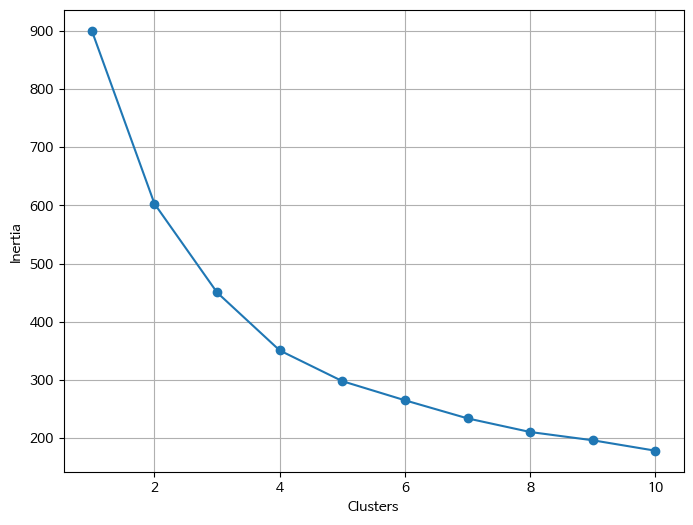

In [95]:
from sklearn.cluster import KMeans

# Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)

# 시각화
plt.figure(figsize = (8, 6))
plt.plot(range(1, 11), inertia, 'o-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [98]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state = 0, max_iter=500)
kmeans.fit(data_std)

KMeans(max_iter=500, n_clusters=3, random_state=0)

In [99]:
final["Cluster"] = kmeans.labels_
final.head()

,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수,웰니스 장소 수,Cluster
0,1,제주시,5590239,1089181,62758194,98565.0,60035.0,44,0
1,2,제주시,4831029,969055,56506530,105365.0,96315.0,44,0
2,3,제주시,4692568,860001,55455349,101888.0,118143.0,44,0
3,4,제주시,5215911,1044158,72466743,136096.0,150286.0,44,0
4,5,제주시,5211568,1039938,79448568,161843.0,167897.0,44,0


In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(data_std)

final['pca_x'] = pca_transformed[:, 0]
final["pca_y"] = pca_transformed[:, 1]
final.head()

,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수,웰니스 장소 수,Cluster,pca_x,pca_y
0,1,제주시,5590239,1089181,62758194,98565.0,60035.0,44,0,3.295344,-0.491252
1,2,제주시,4831029,969055,56506530,105365.0,96315.0,44,0,2.852454,-0.811172
2,3,제주시,4692568,860001,55455349,101888.0,118143.0,44,0,2.525367,-0.857784
3,4,제주시,5215911,1044158,72466743,136096.0,150286.0,44,0,3.635935,-0.869023
4,5,제주시,5211568,1039938,79448568,161843.0,167897.0,44,0,3.992805,-1.072004


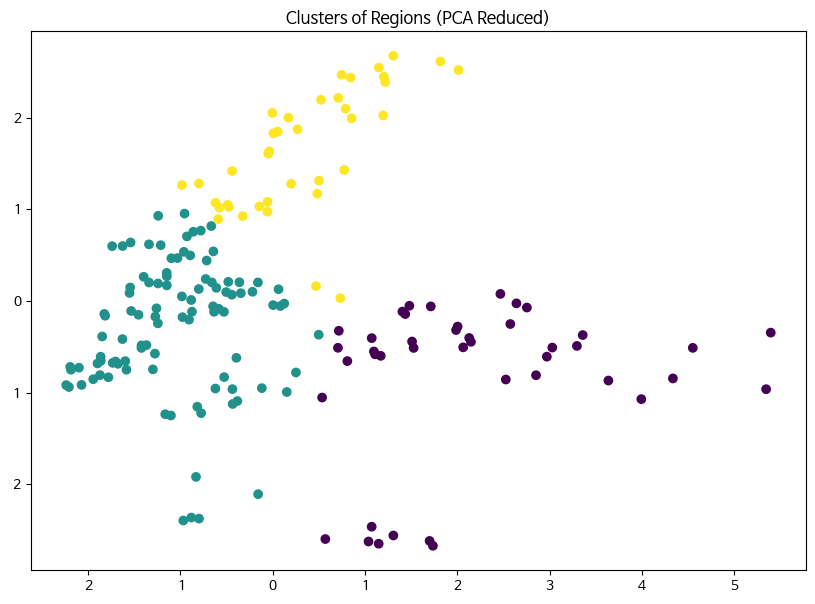

In [101]:
plt.figure(figsize=(10, 7))
plt.scatter(final["pca_x"], final["pca_y"], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters of Regions (PCA Reduced)')
plt.show()

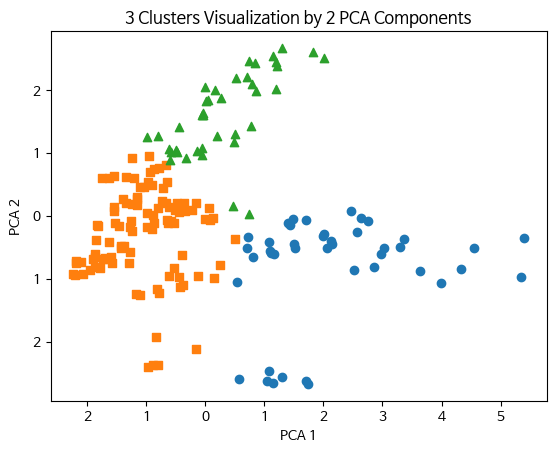

In [102]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = final[final["Cluster"] == 0].index
marker1_ind = final[final["Cluster"] == 1].index
marker2_ind = final[final["Cluster"] == 2].index
marker3_ind = final[final["Cluster"] == 3].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x = final.loc[marker0_ind, "pca_x"], y = final.loc[marker0_ind, "pca_y"], marker = "o")
plt.scatter(x = final.loc[marker1_ind, "pca_x"], y = final.loc[marker1_ind, "pca_y"], marker = "s")
plt.scatter(x = final.loc[marker2_ind, "pca_x"], y = final.loc[marker2_ind, "pca_y"], marker = "^")
plt.scatter(x = final.loc[marker3_ind, "pca_x"], y = final.loc[marker3_ind, "pca_y"], marker = "*")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("3 Clusters Visualization by 2 PCA Components")
plt.show()

In [120]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [121]:
# 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(final_clus, final["Cluster"])
print("silhouette_samples() return 값의 shape", score_samples.shape)

# 실루엣 계수 칼럼 추가
final["silhouette_coeff"] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(final_clus, final["Cluster"])
print("Silhouette Analysis Score: {0:.3f}".format(average_score))
final.head(3)

silhouette_samples() return 값의 shape (180,)
Silhouette Analysis Score: 0.285


,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수,웰니스 장소 수,Cluster,pca_x,pca_y,숙박 비율,silhouette_coeff
0,1,제주시,5590239,1089181,62758194,98565.0,60035.0,44,0,3.295344,-0.491252,19.483621,-0.002331
1,2,제주시,4831029,969055,56506530,105365.0,96315.0,44,0,2.852454,-0.811172,20.058977,0.042362
2,3,제주시,4692568,860001,55455349,101888.0,118143.0,44,0,2.525367,-0.857784,18.326873,0.024111


In [122]:
final.groupby("Cluster")["silhouette_coeff"].mean()

Cluster
0   -0.153119
1    0.617871
2   -0.089737
Name: silhouette_coeff, dtype: float64

In [123]:
import matplotlib.cm as cm

def visualize_silhouette(cluster_lists, X_features):

    # 입력값으로 클러스 터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

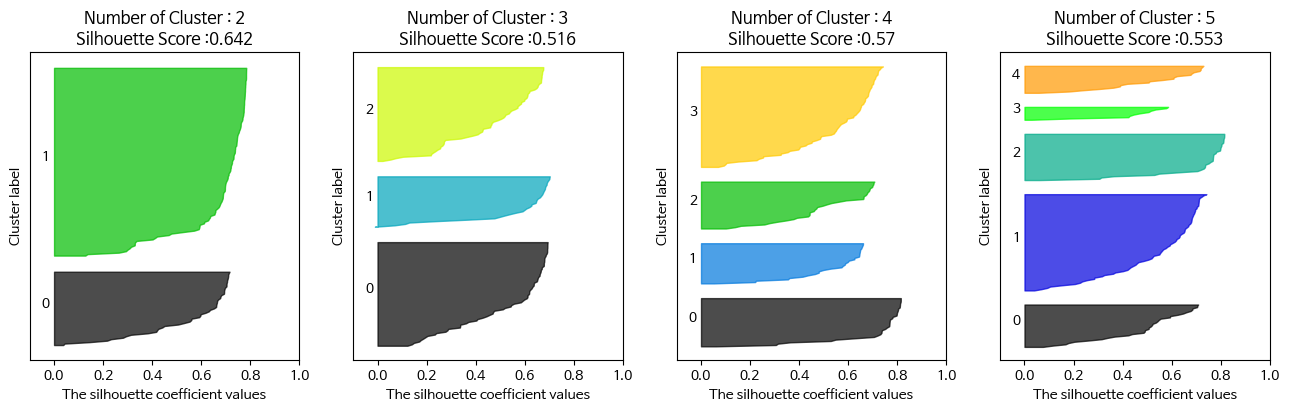

In [124]:
visualize_silhouette([2, 3, 4, 5], final_clus)

### 결과 해석

In [103]:
final["Cluster"].value_counts()

1    99
0    42
2    39
Name: Cluster, dtype: int64

In [104]:
final["숙박 비율"] = final["숙박 방문자수"] / final["방문자수"] * 100
final.head()

,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수,웰니스 장소 수,Cluster,pca_x,pca_y,숙박 비율
0,1,제주시,5590239,1089181,62758194,98565.0,60035.0,44,0,3.295344,-0.491252,19.483621
1,2,제주시,4831029,969055,56506530,105365.0,96315.0,44,0,2.852454,-0.811172,20.058977
2,3,제주시,4692568,860001,55455349,101888.0,118143.0,44,0,2.525367,-0.857784,18.326873
3,4,제주시,5215911,1044158,72466743,136096.0,150286.0,44,0,3.635935,-0.869023,20.018708
4,5,제주시,5211568,1039938,79448568,161843.0,167897.0,44,0,3.992805,-1.072004,19.954417


In [105]:
final_df = final.drop(['전년도 검색 건수','Cluster','pca_x','pca_y'],axis=1)
final_df

,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,웰니스 장소 수,숙박 비율
0,1,제주시,5590239,1089181,62758194,98565.0,44,19.483621
1,2,제주시,4831029,969055,56506530,105365.0,44,20.058977
2,3,제주시,4692568,860001,55455349,101888.0,44,18.326873
3,4,제주시,5215911,1044158,72466743,136096.0,44,20.018708
4,5,제주시,5211568,1039938,79448568,161843.0,44,19.954417
...,...,...,...,...,...,...,...,...
175,8,가평군,3779782,700602,13381316,43338.0,18,18.535513
176,9,가평군,2579016,410424,10568673,31031.0,18,15.913976
177,10,가평군,2811780,430097,12856589,51487.0,18,15.296254
178,11,가평군,1977177,323811,9496223,23214.0,18,16.377441


In [106]:
final_df.corr()

,날짜,방문자수,숙박 방문자수,월별 지출액,검색 건수,웰니스 장소 수,숙박 비율
날짜,1.000000e+00,0.082508,0.116545,0.050563,0.055196,-4.944348e-17,0.156959
방문자수,8.250781e-02,1.000000,0.863674,0.928329,0.462766,-1.950223e-01,-0.227352
숙박 방문자수,1.165452e-01,0.863674,1.000000,0.861007,0.669576,9.769211e-02,0.242623
월별 지출액,5.056303e-02,0.928329,0.861007,1.000000,0.542645,-4.755175e-02,-0.091849
검색 건수,5.519573e-02,0.462766,0.669576,0.542645,1.000000,5.270546e-01,0.390365
웰니스 장소 수,-4.944348e-17,-0.195022,0.097692,-0.047552,0.527055,1.000000e+00,0.458466
숙박 비율,1.569587e-01,-0.227352,0.242623,-0.091849,0.390365,4.584660e-01,1.000000


In [107]:
final_df1 = final.drop(['전년도 검색 건수','숙박 방문자수','월별 지출액','pca_x','pca_y'],axis=1)
final_df1

,날짜,지역,방문자수,검색 건수,웰니스 장소 수,Cluster,숙박 비율
0,1,제주시,5590239,98565.0,44,0,19.483621
1,2,제주시,4831029,105365.0,44,0,20.058977
2,3,제주시,4692568,101888.0,44,0,18.326873
3,4,제주시,5215911,136096.0,44,0,20.018708
4,5,제주시,5211568,161843.0,44,0,19.954417
...,...,...,...,...,...,...,...
175,8,가평군,3779782,43338.0,18,2,18.535513
176,9,가평군,2579016,31031.0,18,2,15.913976
177,10,가평군,2811780,51487.0,18,2,15.296254
178,11,가평군,1977177,23214.0,18,1,16.377441


In [108]:
final.groupby("Cluster").mean()

,날짜,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수,웰니스 장소 수,pca_x,pca_y,숙박 비율
Cluster,,,,,,,,,,
0,6.738095,3.857046e+06,758286.285714,3.573810e+07,112434.023810,113625.571429,39.880952,2.164653,-0.826233,20.024073
1,6.121212,1.691825e+06,265631.424242,7.636639e+06,31321.656566,32009.232323,29.979798,-1.043457,-0.291025,16.519098
2,7.205128,3.913882e+06,562953.410256,2.897033e+07,34896.102564,33421.897436,15.410256,0.317612,1.628544,15.559010


In [110]:
final.groupby("Cluster").median()

,날짜,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수,웰니스 장소 수,pca_x,pca_y,숙박 비율
Cluster,,,,,,,,,,
0,7.0,3882103.5,747927.5,31296167.0,102824.0,101563.0,36.0,1.861327,-0.512082,19.811010
1,6.0,1804711.0,260169.0,7336779.0,26607.0,25799.0,29.0,-0.982138,-0.141800,17.768788
2,7.0,3694449.0,560188.0,21716557.0,33766.0,34096.0,16.0,0.200429,1.611253,15.427632


In [111]:
clus_0 = final[final["Cluster"] == 0]
clus_0.head()

,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수,웰니스 장소 수,Cluster,pca_x,pca_y,숙박 비율
0,1,제주시,5590239,1089181,62758194,98565.0,60035.0,44,0,3.295344,-0.491252,19.483621
1,2,제주시,4831029,969055,56506530,105365.0,96315.0,44,0,2.852454,-0.811172,20.058977
2,3,제주시,4692568,860001,55455349,101888.0,118143.0,44,0,2.525367,-0.857784,18.326873
3,4,제주시,5215911,1044158,72466743,136096.0,150286.0,44,0,3.635935,-0.869023,20.018708
4,5,제주시,5211568,1039938,79448568,161843.0,167897.0,44,0,3.992805,-1.072004,19.954417


In [112]:
clus_0["지역"].value_counts().head(10)

제주시     12
서귀포시    12
강릉시      9
태안군      7
속초시      1
거제시      1
Name: 지역, dtype: int64

In [113]:
clus_0["날짜"].value_counts().head(10)

8     6
4     4
5     4
6     4
7     4
9     4
10    4
1     3
12    3
2     2
Name: 날짜, dtype: int64

In [114]:
clus_1 = final[final["Cluster"] == 1]
clus_1.head()

,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수,웰니스 장소 수,Cluster,pca_x,pca_y,숙박 비율
25,2,강릉시,2453981,467979,15177531,76638.0,106036.0,34,1,0.253065,-0.781035,19.070197
26,3,강릉시,2298799,358895,11685393,49428.0,61358.0,34,1,-0.392021,-0.621220,15.612283
34,11,강릉시,2602272,488851,15422030,66789.0,75690.0,34,1,0.499170,-0.368783,18.785546
36,1,여수시,2199683,464989,13065348,20317.0,15505.0,19,1,-0.857984,0.755219,21.138910
37,2,여수시,1798978,364894,10887833,20410.0,27221.0,19,1,-1.211426,0.608576,20.283405


In [115]:
clus_1["지역"].value_counts().head(10)

보령시       12
남해군       12
부안군       12
포항시 남구    12
포항시 북구    12
거제시       11
속초시        9
가평군        6
여수시        5
태안군        5
Name: 지역, dtype: int64

In [116]:
clus_1["날짜"].value_counts().head(10)

2     11
3     11
11    10
1     10
4      9
12     9
5      8
6      7
9      7
7      6
Name: 날짜, dtype: int64

In [117]:
clus_2 = final[final["Cluster"] == 2]
clus_2.head()

,날짜,지역,방문자수,숙박 방문자수,월별 지출액,검색 건수,전년도 검색 건수,웰니스 장소 수,Cluster,pca_x,pca_y,숙박 비율
41,6,여수시,2214802,491459,17476412,24007.0,21819.0,19,2,-0.589489,0.893124,22.189749
42,7,여수시,3163984,655975,20238808,25691.0,24134.0,19,2,0.200429,1.278915,20.732564
43,8,여수시,2988285,712196,24069380,39573.0,34096.0,19,2,0.484431,1.171178,23.832934
44,9,여수시,2279272,502846,14172806,22072.0,25035.0,19,2,-0.473680,1.025568,22.061693
45,10,여수시,2583808,560188,18537627,32786.0,31455.0,19,2,-0.055094,1.082046,21.680713


In [118]:
clus_2["지역"].value_counts().head(10)

해운대구    12
경주시     12
여수시      7
가평군      6
속초시      2
Name: 지역, dtype: int64

In [119]:
clus_2["날짜"].value_counts().head(10)

7     5
10    5
6     4
8     4
9     4
11    3
12    3
5     3
1     2
2     2
Name: 날짜, dtype: int64

cluster0: 전체 방문자 수도 많고 웰니스 검색에 대한 비율도 많음 / 제주시, 서귀포시, 강릉시
>
cluster1: 유명한 장소들 중에 웰니스 장소 수는 많은 편이지만 웰니스에 대한 검색 건수도 적고 방문자수 자체도 현저히 적음 / 보령시, 남해군, 부안군, 포항시
>
cluster2: 전체 방문자 수는 많지만 웰니스 검색에 대한 비율은 현저히 작음 (웰니스에 대한 관심 낮음) / 해운대구, 경주시

-> 웰니스 장소는 많지만 비교적 인기가 적은 남해군, 부안군, 포항시의 웰니스 관광 활성화 방안 제시

# 신한카드 내국인 데이터

In [125]:
sh=pd.read_csv('travel_sh.csv')

In [126]:
sh.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,42,42,42830,여행,교통,M,40,202107,RED,활동,18730606,78
1,28,42,42830,여행,관광쇼핑,F,50,202107,RED,활동,319575,26
2,43,43,43112,여행,관광쇼핑,F,40,202107,WHITE,활동,100688,17
3,43,43,43770,여행,체험,M,30,202107,RED,활동,1479676,35
4,28,44,44131,여행,체험,F,20,202107,WHITE,활동,700438,26


In [127]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4681798 entries, 0 to 4681797
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   자택광역시도          object
 1   가맹점광역시도         int64 
 2   가맹점시군구          int64 
 3   GB3             object
 4   GB2             object
 5   SEX_CCD         object
 6   CLN_AGE_R       int64 
 7   TA_YM           int64 
 8   DAW_CCD_R       object
 9   APV_TS_DL_TM_R  object
 10  VLM             int64 
 11  USEC            int64 
dtypes: int64(6), object(6)
memory usage: 428.6+ MB


### 남해

In [149]:
data = pd.read_csv("남해군_인기관광지_전체.csv", encoding='cp949')
data.head()

,순위,관광지명,주소,분류,Unnamed: 4
0,1,독일마을,경남 남해군 독일로 92-0,기타관광,157760
1,2,보리암,경남 남해군 보리암로 665-0,종교성지,87713
2,3,상주은모래비치,경남 남해군 상주로 17-0,자연경관(하천/해양),52256
3,4,아난티남해,경남 남해군 남서대로1179번길 40-109,콘도미니엄,51896
4,5,설리스카이워크,경남 남해군 미송로303번길 176-0,기타관광,29576


In [150]:
data["분류"].value_counts()

펜션/민박          25
자연경관(하천/해양)    18
기타관광           10
호텔              6
캠핑              6
콘도미니엄           4
전시시설            4
기타문화관광지         3
종교성지            3
도시공원            3
자연공원            3
농/산/어촌체험        2
데이트코스           2
육상레저스포츠         2
역사유적지           2
모텔              2
테마공원            1
시장              1
교통시설            1
기타레저스포츠         1
랜드마크관광          1
Name: 분류, dtype: int64

In [151]:
data = data.rename(columns={'Unnamed: 4': '검색건수'})

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    int64 
 1   관광지명    100 non-null    object
 2   주소      100 non-null    object
 3   분류      100 non-null    object
 4   검색건수    100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [153]:
wellness = data[(data["분류"] == "자연공원") | (data["분류"] == "자연경관(하천/해양)") | (data["분류"] == "종교성지") | (data["분류"] == "자연공원") |
                (data["분류"] == "도시공원") | (data["분류"] == "테마공원") | (data["분류"] == "캠핑") | (data["분류"] == "농/산/어촌체험")]

In [154]:
wellness.head()

,순위,관광지명,주소,분류,검색건수
1,2,보리암,경남 남해군 보리암로 665-0,종교성지,87713
2,3,상주은모래비치,경남 남해군 상주로 17-0,자연경관(하천/해양),52256
6,7,미조항,경남 남해군 미조로 235-0,자연경관(하천/해양),22131
9,10,남해편백자연휴양림,경남 남해군 금암로 658-0,자연공원,14482
12,13,섬이정원,경남 남해군 남면로 1534-110,테마공원,9177


In [155]:
wellness["분류"].value_counts()

자연경관(하천/해양)    18
캠핑              6
종교성지            3
자연공원            3
도시공원            3
농/산/어촌체험        2
테마공원            1
Name: 분류, dtype: int64

In [158]:
top10 = wellness.sort_values(by = "검색건수", ascending = False)[:10]

In [159]:
top10

,순위,관광지명,주소,분류,검색건수
1,2,보리암,경남 남해군 보리암로 665-0,종교성지,87713
2,3,상주은모래비치,경남 남해군 상주로 17-0,자연경관(하천/해양),52256
6,7,미조항,경남 남해군 미조로 235-0,자연경관(하천/해양),22131
9,10,남해편백자연휴양림,경남 남해군 금암로 658-0,자연공원,14482
12,13,섬이정원,경남 남해군 남면로 1534-110,테마공원,9177
14,15,송정솔바람해변,경남 남해군,자연경관(하천/해양),8596
15,16,사촌해수욕장,경남 남해군,자연경관(하천/해양),7593
16,17,설리해수욕장,경남 남해군,자연경관(하천/해양),7223
19,20,이순신순국공원,경남 남해군,도시공원,5676
22,23,상주은모래비치캠핑장,경남 남해군 상주로 17-4,캠핑,3821


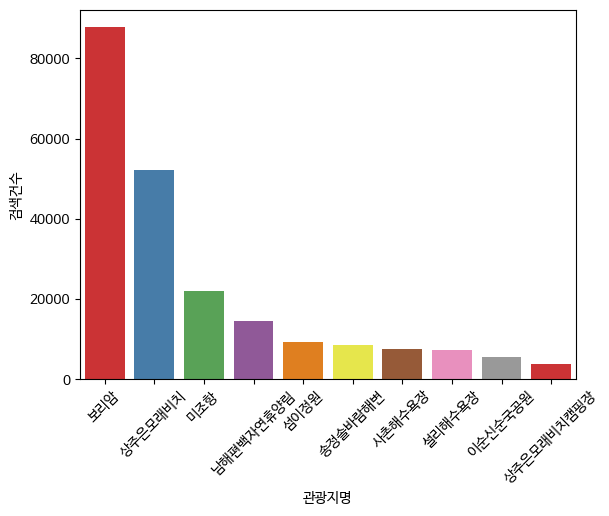

In [161]:
sns.barplot(x = "관광지명", y = "검색건수", data = top10, palette = "Set1")
plt.xticks(rotation = 45)
plt.show()

In [166]:
data2 = pd.read_csv("월별 남해 통계.csv", encoding='cp949')
data2.head()

,기준연월,지역명,검색량(건),방문자 수,숙박방문자 수
0,202201,경상남도 남해군,12580,709015,142110
1,202202,경상남도 남해군,13968,571594,100230
2,202203,경상남도 남해군,13929,541003,85620
3,202204,경상남도 남해군,16438,716998,138599
4,202205,경상남도 남해군,21111,812772,152918


In [167]:
data2["평균"] = data2[["검색량(건)", "방문자 수", "숙박방문자 수"]].mean(axis = 1)
data2.head()

,기준연월,지역명,검색량(건),방문자 수,숙박방문자 수,평균
0,202201,경상남도 남해군,12580,709015,142110,287901.666667
1,202202,경상남도 남해군,13968,571594,100230,228597.333333
2,202203,경상남도 남해군,13929,541003,85620,213517.333333
3,202204,경상남도 남해군,16438,716998,138599,290678.333333
4,202205,경상남도 남해군,21111,812772,152918,328933.666667


In [168]:
data2.sort_values(by = "평균", ascending = False)

,기준연월,지역명,검색량(건),방문자 수,숙박방문자 수,평균
7,202208,경상남도 남해군,24663,1028446,216942,423350.333333
6,202207,경상남도 남해군,22257,886664,186233,365051.333333
9,202210,경상남도 남해군,20137,858753,161049,346646.333333
4,202205,경상남도 남해군,21111,812772,152918,328933.666667
8,202209,경상남도 남해군,23987,763696,156296,314659.666667
3,202204,경상남도 남해군,16438,716998,138599,290678.333333
0,202201,경상남도 남해군,12580,709015,142110,287901.666667
5,202206,경상남도 남해군,22231,701240,139294,287588.333333
10,202211,경상남도 남해군,18236,637362,111891,255829.666667
11,202212,경상남도 남해군,19287,578296,123294,240292.333333


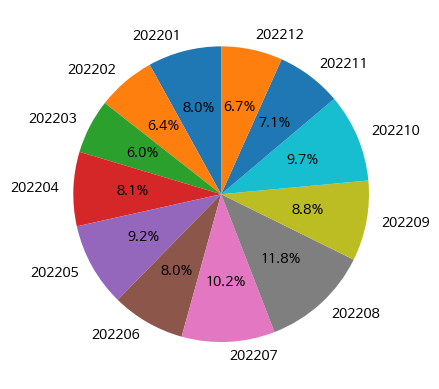

In [169]:
plt.pie(data2["평균"], labels = data2["기준연월"], autopct = '%.1f%%', startangle = 90)
plt.show()
# 파이차트로 확인한 결과, 남해는 여름에 많이 가긴 하지만 대체로 연중 고르게 방문함

In [170]:
data3 = pd.read_csv("남해 카드 데이터.csv")
data3.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,46,48,48840,여행,관광쇼핑,M,50,202107,RED,활동,542839,26
1,11,48,48840,여행,교통,F,30,202007,WHITE,활동,43484,8
2,31,48,48840,여행,관광쇼핑,M,20,202008,RED,활동,246892,17
3,27,48,48840,여행,체험,F,20,202108,WHITE,활동,3306483,280
4,41,48,48840,여행,숙박,F,50,202108,WHITE,휴식,4380921,58


In [171]:
data3["CLN_AGE_R"].value_counts()

40    6919
50    6680
30    6615
20    5179
60    4681
Name: CLN_AGE_R, dtype: int64

In [174]:
data3 = data3[(data3["TA_YM"] == 202201) | (data3["TA_YM"] == 202202) | (data3["TA_YM"] == 202203) | (data3["TA_YM"] == 202204) |
                     (data3["TA_YM"] == 202205) | (data3["TA_YM"] == 202206) | (data3["TA_YM"] == 202207) | (data3["TA_YM"] == 202208) |
                     (data3["TA_YM"] == 202209) | (data3["TA_YM"] == 202210) | (data3["TA_YM"] == 202211) | (data3["TA_YM"] == 202212)]

data3.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
8,28,48,48840,여행,관광쇼핑,M,30,202208,WHITE,활동,864556,19
65,26,48,48840,여행,숙박,M,60,202207,RED,휴식,1014870,30
66,*,48,48840,여행,체험,M,40,202207,WHITE,활동,50743,10
67,42,48,48840,여행,체험,M,50,202207,RED,활동,548030,50
68,48,48,48840,여행,체험,M,60,202207,RED,활동,2521953,162


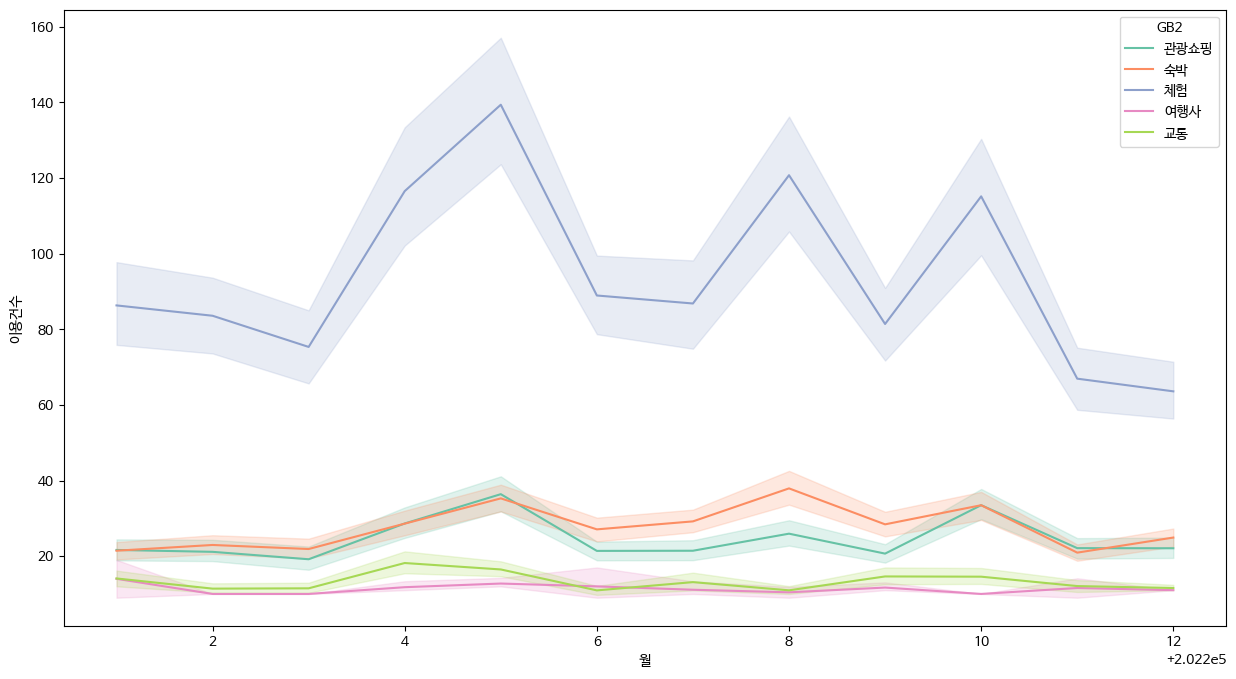

In [175]:
plt.figure(figsize = (15, 8))

sns.lineplot(x = "TA_YM", y = "USEC", hue = "GB2", data = data3, palette = "Set2")
plt.xlabel("월")
plt.ylabel("이용건수")

plt.show()

-> 대체로 "체험" 이용건수가 높으며, 특히 5월에는 체험 건수가 가장 높았음

->숙박건수는 8월에 가장 높아짐. -> 사람들이 8월에 휴가를 많이 오는것으로 추정

In [176]:
# 카드 이용 건당 평균 거래 금액 계산
data3["AVG_VLM"] = data3["VLM"] / data3["USEC"]

data3.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC,AVG_VLM
8,28,48,48840,여행,관광쇼핑,M,30,202208,WHITE,활동,864556,19,45502.947368
65,26,48,48840,여행,숙박,M,60,202207,RED,휴식,1014870,30,33829.000000
66,*,48,48840,여행,체험,M,40,202207,WHITE,활동,50743,10,5074.300000
67,42,48,48840,여행,체험,M,50,202207,RED,활동,548030,50,10960.600000
68,48,48,48840,여행,체험,M,60,202207,RED,활동,2521953,162,15567.611111


In [177]:
data3["CLN_AGE_R"].value_counts()

40    2381
50    2292
30    2193
20    1689
60    1665
Name: CLN_AGE_R, dtype: int64

In [178]:
data3.groupby("CLN_AGE_R").mean()

,가맹점광역시도,가맹점시군구,TA_YM,VLM,USEC,AVG_VLM
CLN_AGE_R,,,,,,
20,48.0,48840.0,202206.648313,5.644970e+05,34.327413,19070.311044
30,48.0,48840.0,202206.609667,1.083434e+06,58.583675,26137.515982
40,48.0,48840.0,202206.579588,1.355985e+06,62.029399,29488.139451
50,48.0,48840.0,202206.527051,1.199631e+06,52.146597,36158.111290
60,48.0,48840.0,202206.555556,1.001957e+06,39.819820,36697.729369


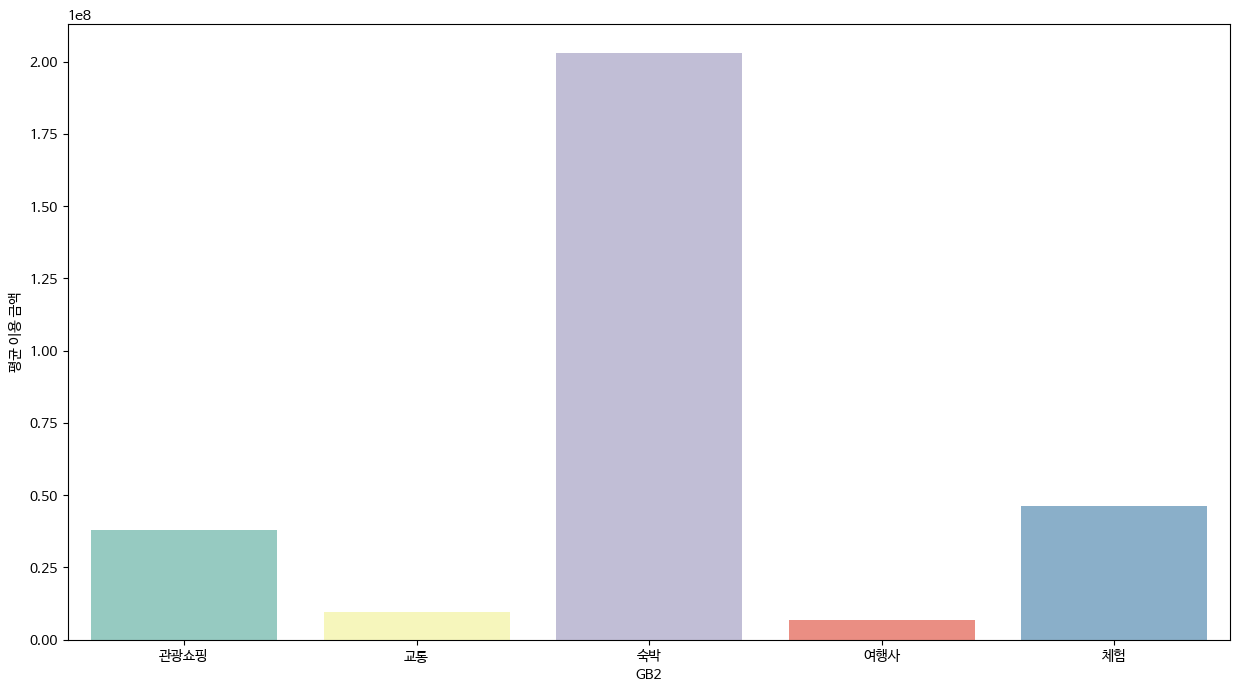

In [179]:
data4 = data3.groupby("GB2")["AVG_VLM"].sum().reset_index()

plt.figure(figsize = (15, 8))
sns.barplot(x = "GB2", y = "AVG_VLM", data = data4, palette = "Set3")
plt.xlabel("GB2")
plt.ylabel("평균 이용 금액")
plt.show()

-> 평균 이용 금액은 숙박에서 가장 높았음.
-> 이를 통해 남해는 "체험" 및 "숙박"을 위주로 홍보 및 개발을 하면 좋을것 같음

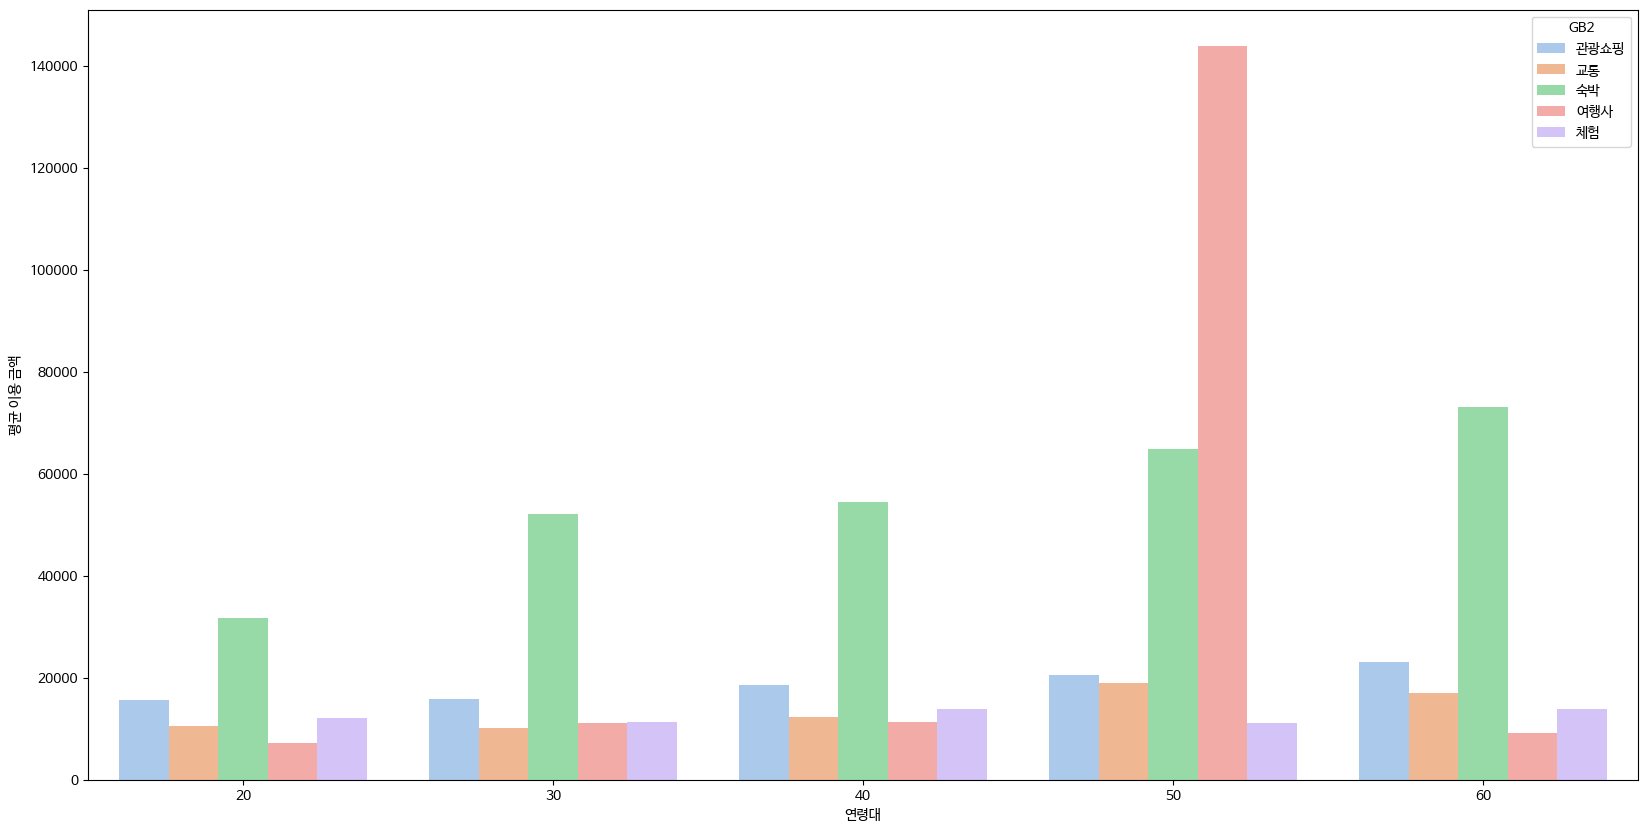

In [180]:
data5 = data3.groupby(["CLN_AGE_R", "GB2"])["AVG_VLM"].mean().reset_index()

plt.figure(figsize = (20, 10))
sns.barplot(x = "CLN_AGE_R", y = "AVG_VLM", hue = "GB2", data = data5, palette = "pastel")
plt.xlabel("연령대")
plt.ylabel("평균 이용 금액")
plt.show()

In [183]:
data3.groupby("CLN_AGE_R").sum()[["VLM", "USEC"]]

,VLM,USEC
CLN_AGE_R,,
20,953435499,57979
30,2375970210,128474
40,3228600521,147692
50,2749553305,119520
60,1668258621,66300


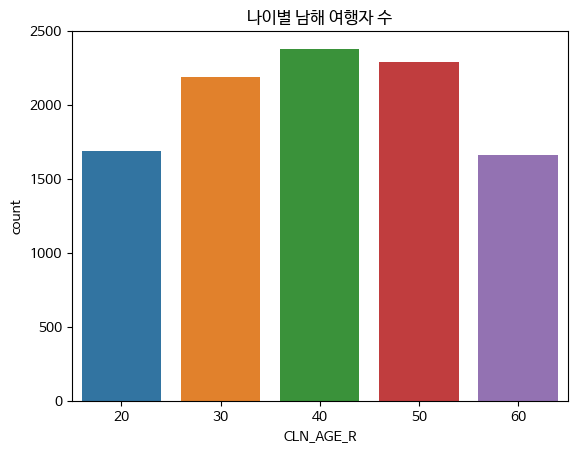

In [182]:
sns.countplot(x = data3["CLN_AGE_R"])
plt.title("나이별 남해 여행자 수")

plt.show()

### 부안

In [128]:
bu=sh[sh['가맹점시군구']==45800]
bu = bu.reset_index(drop = True)

In [129]:
bu["년"] = bu["TA_YM"].astype(str).str[:4]
bu["월"] = bu["TA_YM"].astype(str).str[4:]

In [130]:
bu.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC,년,월
0,45,45,45800,여행,숙박,F,30,202007,RED,활동,18212931,347,2020,07
1,41,45,45800,여행,숙박,F,60,202007,WHITE,활동,23335372,191,2020,07
2,28,45,45800,여행,숙박,F,30,202107,WHITE,휴식,157598,17,2021,07
3,41,45,45800,여행,숙박,F,30,202007,RED,활동,19091573,260,2020,07
4,45,45,45800,여행,숙박,M,20,202007,WHITE,활동,2378325,86,2020,07


In [131]:
bu22 = bu[bu['년']=='2022']
bu22=bu22.drop(['TA_YM','가맹점광역시도','년','가맹점시군구','GB3'],axis=1)
bu22

,자택광역시도,GB2,SEX_CCD,CLN_AGE_R,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC,월
42,29,숙박,M,40,RED,활동,53282228,842,07
43,28,숙박,F,40,WHITE,활동,7108255,162,07
44,45,체험,M,30,WHITE,활동,1481711,30,07
45,41,교통,M,40,WHITE,활동,446543,20,07
46,44,관광쇼핑,M,30,RED,활동,426245,20,07
...,...,...,...,...,...,...,...,...,...
16910,30,숙박,F,60,WHITE,휴식,592662,9,06
16911,26,숙박,M,40,WHITE,휴식,98777,9,06
16912,31,숙박,M,30,WHITE,활동,3131235,39,06
16913,45,체험,M,50,RED,활동,2222485,29,06


In [132]:
bu22 = bu22.reset_index(drop = True)

<Axes: xlabel='자택광역시도', ylabel='count'>

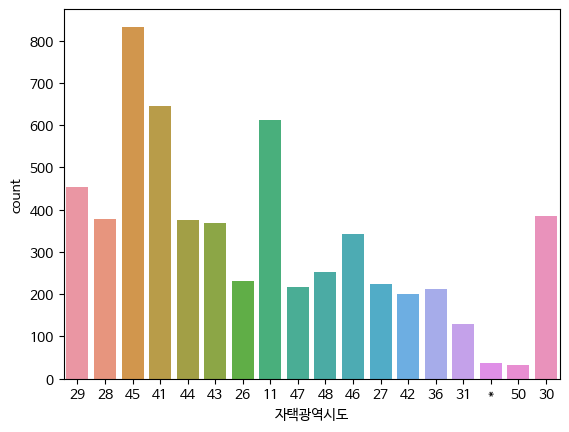

In [133]:
sns.countplot(x=bu22['자택광역시도'])

-> 외부 방문자 출신: 전북, 경기, 서울이 top 3 (위치가 인접한 지역들)

<Axes: xlabel='CLN_AGE_R', ylabel='count'>

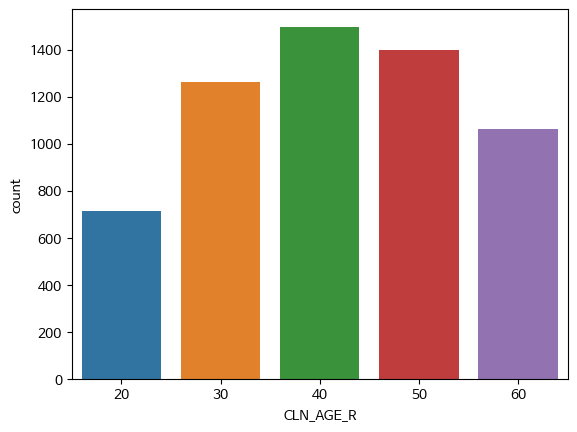

In [134]:
sns.countplot(x=bu22['CLN_AGE_R'])

In [135]:
bu22['CLN_AGE_R'].value_counts()
# 데이터에 존재하는 나이대 기준 40-50대가 가장 많음

40    1497
50    1400
30    1260
60    1062
20     714
Name: CLN_AGE_R, dtype: int64

In [136]:
bu22.groupby('CLN_AGE_R').mean()
# 한 사람 당 평균 사용 횟수: 30-40대가 많음

,VLM,USEC
CLN_AGE_R,,
20,1.248925e+06,27.981793
30,4.418660e+06,83.783333
40,7.171733e+06,105.814963
50,4.817747e+06,56.350714
60,3.854047e+06,43.317326


In [137]:
bu22.groupby('CLN_AGE_R').sum()
# 나이대 별 총 사용 횟수의 합 : 30-40대가 가장 많음

,VLM,USEC
CLN_AGE_R,,
20,891732331,19979
30,5567511377,105567
40,10736083910,158405
50,6744846170,78891
60,4092997563,46003


<Axes: xlabel='월', ylabel='count'>

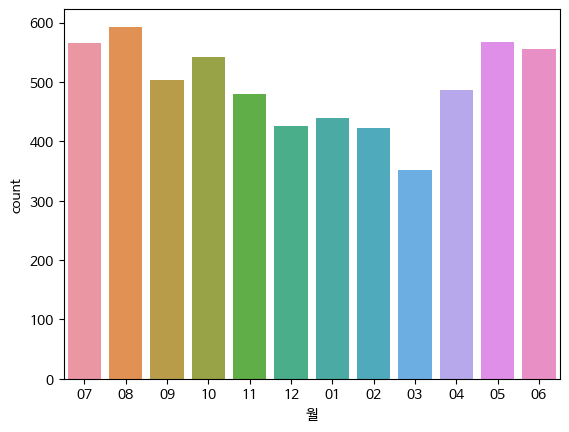

In [138]:
sns.countplot(x=bu22['월'])

In [142]:
df=pd.read_csv('부안군_인기관광지_전체.csv',encoding='cp949')
df.head(30)

,순위,관광지명,주소,분류,Unnamed: 4
0,1,소노벨변산,전북 부안군 변산해변로 51-0,콘도미니엄,100675
1,2,채석강,전북 부안군,기타관광,82076
2,3,변산해수욕장,전북 부안군,자연경관(하천/해양),58740
3,4,격포항,전북 부안군 격포중앙길 28-7,자연경관(하천/해양),58168
4,5,내소사,전북 부안군 내소사로 243-0,종교성지,40181
5,6,곰소항,전북 부안군 곰소항길 62-5,자연경관(하천/해양),32343
6,7,격포해넘이해수욕장,전북 부안군,자연경관(하천/해양),20279
7,8,격포항수산시장,전북 부안군 격포중앙길 28-4,시장,17479
8,9,부안상설시장,전북 부안군 부풍로 47-0,시장,16974
9,10,변산반도국립공원,전북 부안군,자연공원,15409


### 포항

In [193]:
ph=sh[(sh['가맹점시군구']==47111)|(sh['가맹점시군구']==47113)]
ph = ph.reset_index(drop = True)
ph.head()

,자택광역시도,가맹점광역시도,가맹점시군구,GB3,GB2,SEX_CCD,CLN_AGE_R,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,45,47,47111,여행,숙박,M,50,202107,WHITE,휴식,1138212,17
1,26,47,47113,여행,숙박,F,40,202007,RED,활동,3130863,26
2,45,47,47113,여행,숙박,M,20,202007,RED,휴식,521810,8
3,47,47,47111,여행,숙박,M,30,202108,WHITE,활동,19090374,396
4,27,47,47111,여행,숙박,F,30,202007,RED,활동,1626309,26


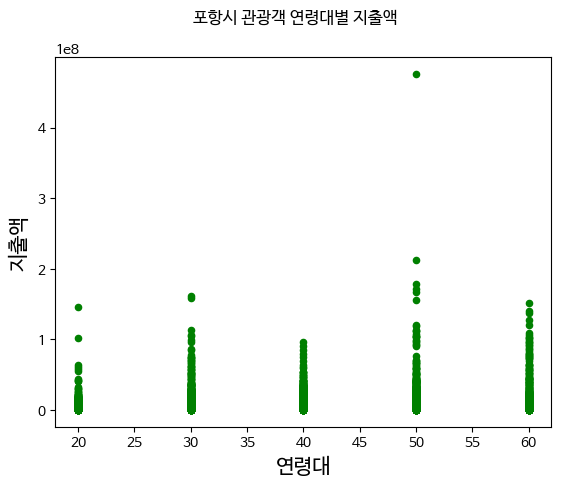

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xlabel('연령대', fontsize=15)
plt.ylabel('지출액', fontsize=15)
plt.suptitle('포항시 관광객 연령대별 지출액')
plt.scatter(ph['CLN_AGE_R'],ph['VLM'],color='g',s=20)

In [195]:
ph["년"] = ph["TA_YM"].astype(str).str[:4]
ph["월"] = ph["TA_YM"].astype(str).str[4:]

In [197]:
ph22 = ph[ph['년']=='2022']
ph22=ph22.drop(['TA_YM','가맹점광역시도','년','가맹점시군구','GB3'],axis=1)
ph22.head()

,자택광역시도,GB2,SEX_CCD,CLN_AGE_R,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC,월
30,43,교통,M,50,RED,활동,545349,12,05
78,30,숙박,M,50,RED,활동,405948,10,07
79,47,체험,F,50,RED,활동,781450,20,07
80,41,숙박,F,40,RED,휴식,1522305,10,07
81,31,숙박,M,40,RED,휴식,466840,20,07


In [198]:
ph22 = ph22.reset_index(drop = True)

<Axes: xlabel='CLN_AGE_R', ylabel='count'>

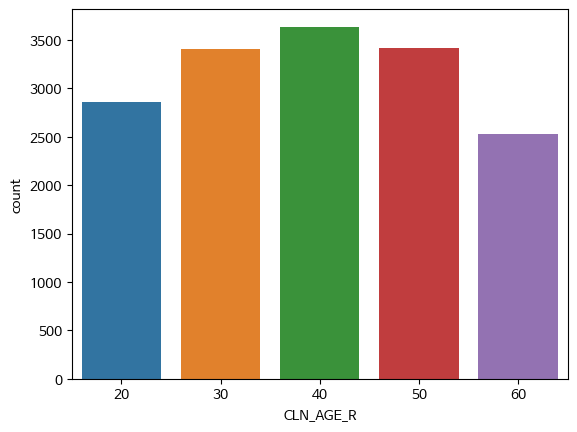

In [199]:
sns.countplot(x=ph22['CLN_AGE_R'])

In [200]:
ph22.groupby("CLN_AGE_R").sum()

,VLM,USEC
CLN_AGE_R,,
20,5405964812,91140
30,10391902160,140237
40,11763533910,157826
50,13199110803,137505
60,7438638356,72972


In [194]:
ph[ph['CLN_AGE_R']==20]['GB2'].value_counts()

숙박      6194
관광쇼핑     793
교통       667
체험       635
여행사       16
Name: GB2, dtype: int64

-> 20대가 현저히 낮음